<a href="https://colab.research.google.com/github/soumyadiptapete/Coursera_TF_specialization/blob/master/rock_paper_scissors_TLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-05-17 11:43:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   182MB/s    in 1.0s    

2019-05-17 11:43:29 (182 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-05-17 11:43:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-025.png', 'rock01-053.png', 'rock02-019.png', 'rock05ck01-118.png', 'rock02-026.png', 'rock07-k03-090.png', 'rock07-k03-071.png', 'rock03-105.png', 'rock06ck02-041.png', 'rock04-092.png']
['paper01-004.png', 'paper07-067.png', 'paper01-008.png', 'paper07-070.png', 'paper07-059.png', 'paper02-027.png', 'paper07-052.png', 'paper07-024.png', 'paper07-064.png', 'paper02-108.png']
['testscissors02-035.png', 'scissors03-034.png', 'scissors03-018.png', 'testscissors01-095.png', 'scissors03-028.png', 'testscissors01-075.png', 'testscissors01-023.png', 'scissors01-072.png', 'scissors04-074.png', 'scissors03-023.png']


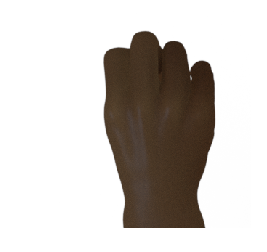

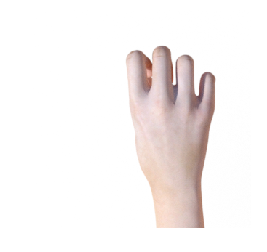

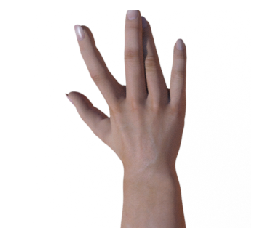

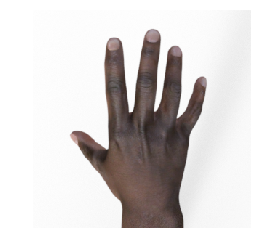

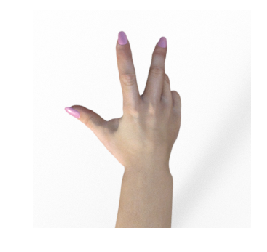

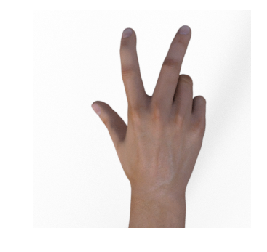

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
import tensorflow as tf
import keras_preprocessing
import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.models import Model

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',batch_size=100
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',batch_size=32
)

pre_trained_model=keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable=False




Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
pre_trained_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_447 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_447 (BatchN (None, 74, 74, 32)   96          conv2d_447[0][0]                 
__________________________________________________________________________________________________
activation_445 (Activation)     (None, 74, 74, 32)   0           batch_normalization_447[0][0]    
__________________________________________________________________________________________________
conv2d_448

In [30]:
from keras.layers import Dropout
last_layer=pre_trained_model.get_layer('mixed10').output
X=Flatten()(last_layer)
X=Dense(512,activation=tf.nn.relu)(X)
X=Dropout(0.4)(X)
pred=Dense(3,activation=tf.nn.softmax)(X)

model=Model(inputs=pre_trained_model.input,outputs=pred)
  

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1,steps_per_epoch=30,validation_steps=15)

model.save("rps.h5")

Epoch 1/25
30/30 [==============================] - 38s 1s/step - loss: 8.0884 - acc: 0.4325 - val_loss: 8.8358 - val_acc: 0.3932
Epoch 2/25
30/30 [==============================] - 22s 731ms/step - loss: 3.1476 - acc: 0.7009 - val_loss: 4.9504 - val_acc: 0.6709
Epoch 3/25
30/30 [==============================] - 23s 753ms/step - loss: 1.5929 - acc: 0.8149 - val_loss: 7.1941 - val_acc: 0.4518
Epoch 4/25
30/30 [==============================] - 22s 736ms/step - loss: 1.3848 - acc: 0.8347 - val_loss: 3.5349 - val_acc: 0.6218
Epoch 5/25
30/30 [==============================] - 24s 811ms/step - loss: 1.0113 - acc: 0.8623 - val_loss: 4.3464 - val_acc: 0.6261
Epoch 6/25
30/30 [==============================] - 23s 771ms/step - loss: 0.6086 - acc: 0.8996 - val_loss: 5.0053 - val_acc: 0.4808
Epoch 7/25
30/30 [==============================] - 23s 778ms/step - loss: 0.5758 - acc: 0.8982 - val_loss: 2.8555 - val_acc: 0.5548
Epoch 8/25
30/30 [==============================] - 23s 756ms/step - los

KeyboardInterrupt: ignored

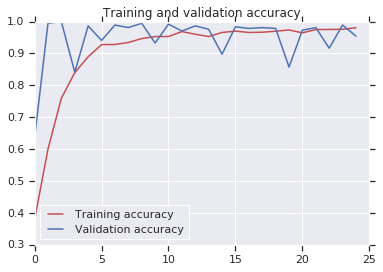

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper2.png to paper2 (1).png
Saving rock-hires2.png to rock-hires2.png
Saving scissors-hires2.png to scissors-hires2.png
Saving paper-hires2.png to paper-hires2.png
Saving paper-hires1.png to paper-hires1.png
Saving rock-hires1.png to rock-hires1 (1).png
Saving scissors-hires1.png to scissors-hires1.png
Saving scissors9.png to scissors9.png
Saving scissors8.png to scissors8.png
Saving scissors7.png to scissors7 (1).png
Saving rock9.png to rock9.png
Saving rock8.png to rock8.png
Saving rock7.png to rock7.png
Saving paper9.png to paper9.png
Saving paper8.png to paper8.png
Saving paper7.png to paper7.png
Saving scissors6.png to scissors6.png
Saving scissors5.png to scissors5.png
Saving scissors4.png to scissors4.png
Saving paper6.png to paper6.png
Saving paper5.png to paper5.png
Saving paper4.png to paper4.png
Saving rock6.png to rock6.png
Saving rock5.png to rock5.png
Saving rock4.png to rock4.png
Saving scissors3.png to scissors3.png
Saving scissors2.png to scissors2.png
Saving s